In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to "date".)
df = pd.read_csv("data/fcc-forum-pageviews.csv")

df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [ ]:
print(df.describe())
print(df.info())

In [2]:
# Clean data
df["date"] = pd.to_datetime(df["date"])

df = df.loc[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]

df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


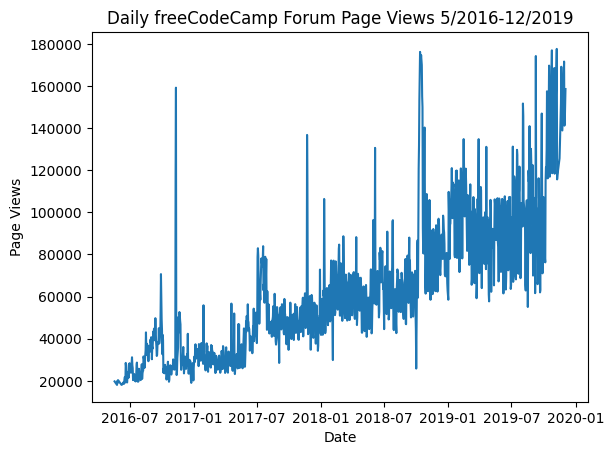

In [3]:
def draw_line_plot():
    df_line = df.copy()
    df_line.reset_index(inplace=True)

    # Draw line plot
    fig, ax = plt.subplots()
    ax.plot(df_line["date"], df_line["value"])
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # fig.savefig("line_plot.png")
    return fig


plt.show(draw_line_plot())

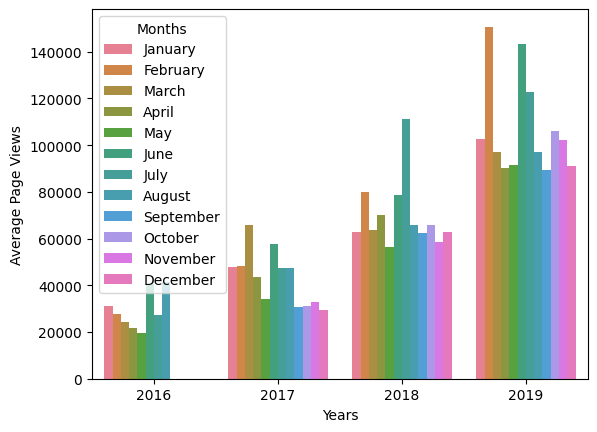

In [4]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar.reset_index(inplace=True)

    df_bar["year"] = df_bar["date"].dt.year
    df_bar["month"] = df_bar["date"].dt.month_name()
    df_bar["day"] = df_bar["date"].dt.day

    df_bar = df_bar.groupby(["year", "month"], as_index=False)["value"].mean()

    # Draw bar plot
    fig, ax = plt.subplots()

    ax = sns.barplot(data=df_bar, x="year", y="value", hue="month")

    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")

    sorted_labels = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    # This way labels always default to black color
    # ax.legend(sorted_labels, title="Months", loc="upper left")

    # Workaround for unsorted labels
    # Hint found at https://www.c-sharpcorner.com/article/a-complete-python-seaborn-tutorial/
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:], sorted_labels, title="Months")

    # fig.savefig("bar_plot.png")
    return fig


plt.show(draw_bar_plot())

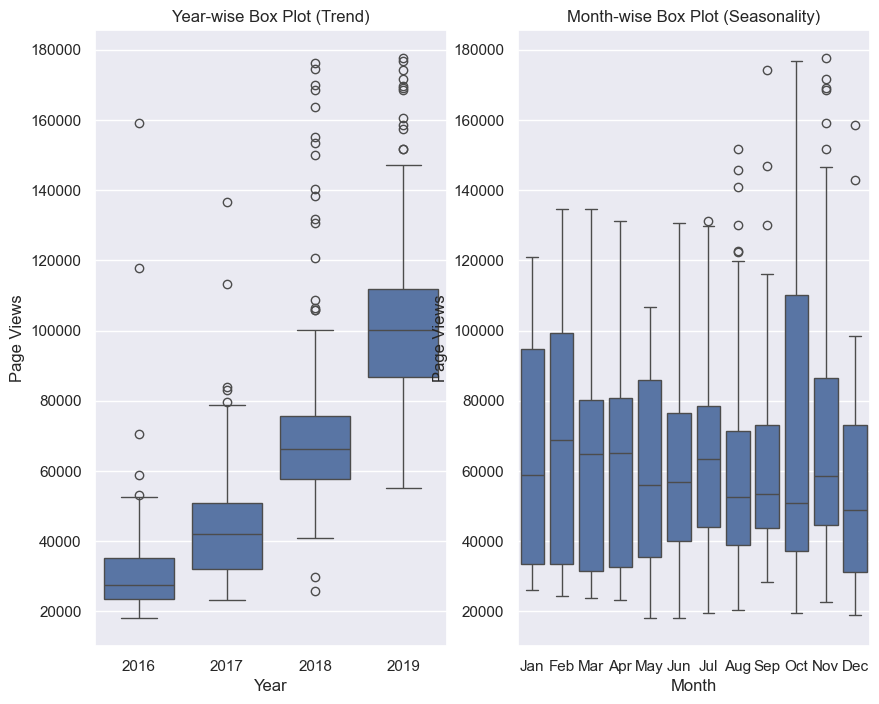

In [8]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)

    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]

    sns.set(rc={"figure.figsize": (10, 8)})

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1, 2)

    sns.boxplot(data=df_box, ax=ax[0], x="year", y="value")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")
    ax[0].set_title("Year-wise Box Plot (Trend)")

    sns.boxplot(
        data=df_box,
        ax=ax[1],
        x="month",
        order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
        y="value",
    )
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")
    ax[1].set_title("Month-wise Box Plot (Seasonality)")

    # fig.savefig("box_plot.png")
    return fig


plt.show(draw_box_plot())